In [20]:
import numpy as np 
import matplotlib.pyplot as plt 

n=60
L=30
dx=L/n
x=np.arange(-L/2,L/2,dx,dtype='complex')
# f=np.sin(x)
# df=np.cos(x)
f=np.cos(x)*np.exp(-np.power(x,2)/25)
df=-(np.sin(x) * np.exp(-np.power(x,2)/25) + (2/25)*x*f)



In [ ]:
#approximate derivative using finite difference

dfFD=np.zeros(len(df),dtype='complex')
for kappa in range (len(df)-1):
  dfFD[kappa]=(f[kappa+1]-f[kappa])/dx
dfFD[-1]=dfFD[-2]

In [22]:
##derivative using fft(spectral derivative)
fhat=np.fft.fft(f)

kappa=(2*np.pi/L)*np.arange(-n/2,n/2)

kappa=np.fft.fftshift(kappa)
dfhat=kappa*fhat*(1j)
dfFFT=np.real(np.fft.ifft(dfhat))

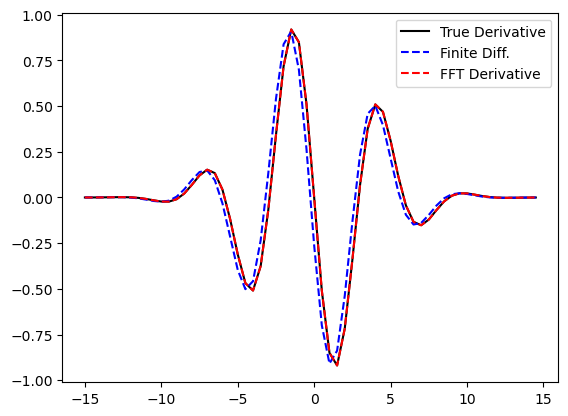

In [23]:
#Plots
plt.plot(x,df.real,color='k',label="True Derivative")
plt.plot(x,dfFD.real,'--',color='b',label="Finite Diff.")

plt.plot(x,dfFFT.real,'--',color='r',label='FFT Derivative')
plt.legend()
plt.show()